In [8]:
from google.colab import files
uploaded = files.upload()

### fazer upload dos arquivos:
# ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
# ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
# ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
# ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
# ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx

Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg


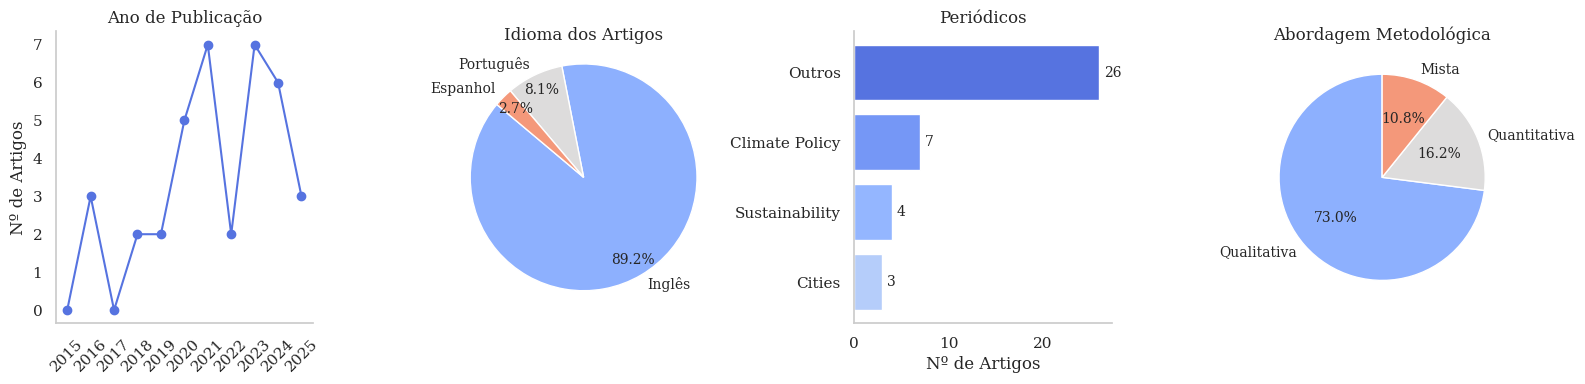

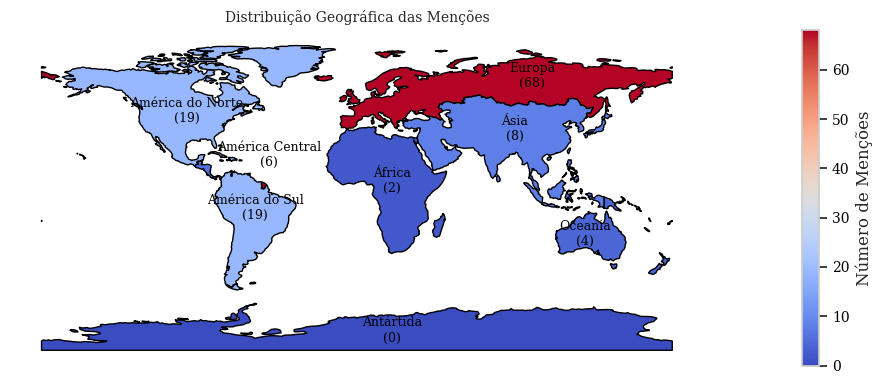

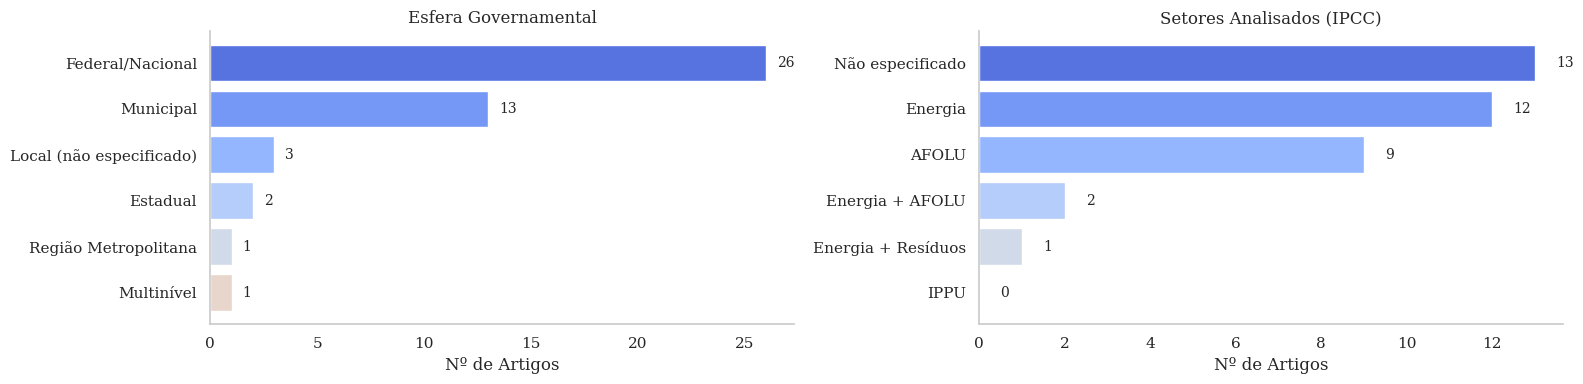

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

sns.set_style("whitegrid")

# -----------------------------
# CONFIGURAÇÃO GLOBAL DE FONTE
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif", "Times New Roman", "Times", "Nimbus Roman"],
    "axes.titleweight": "normal",
    "axes.labelweight": "normal",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

sns.set_theme(style="whitegrid", font="serif", rc={
    "font.serif": ["DejaVu Serif", "Times New Roman", "Times", "Nimbus Roman"]
})

# -----------------------------
# DADOS
# -----------------------------
anos = ['2015','2016', '2017','2018', '2019','2020', '2021', '2022','2023', '2024', '2025']
artigos_ano = [0,3,0,2,2,5, 7,2, 7, 6,3]

idiomas = ['Inglês', 'Português', 'Espanhol']
artigos_idioma = [33, 3, 1]

periodicos = ['Climate Policy', 'Sustainability', 'Cities', 'Outros']
artigos_periodicos = [7, 4, 3, 26]

esferas = ['Federal/Nacional', 'Municipal', 'Estadual', 'Local (não especificado)', 'Região Metropolitana', 'Multinível']
artigos_esfera = [26, 13, 2, 3, 1, 1]

metodologias = ['Qualitativa', 'Quantitativa', 'Mista']
artigos_metodologia = [27, 6, 4]

setores = ['Energia', 'AFOLU', 'Energia + AFOLU', 'Energia + Resíduos', 'IPPU', 'Não especificado']
artigos_setores = [12, 9, 2, 1, 0, 13]

# DataFrames ordenados
df_periodicos = pd.DataFrame({'periodico': periodicos, 'artigos': artigos_periodicos}).sort_values(by='artigos', ascending=False)
df_esferas = pd.DataFrame({'esfera': esferas, 'artigos': artigos_esfera}).sort_values(by='artigos', ascending=False)
df_setores = pd.DataFrame({'setor': setores, 'artigos': artigos_setores}).sort_values(by='artigos', ascending=False)

# Paletas
bar_palette = sns.color_palette("coolwarm", 10)
pie_colors_idioma = sns.color_palette("coolwarm", len(idiomas))
pie_colors_metodologias = sns.color_palette("coolwarm", len(metodologias))

# -----------------------------
# LINHA 1 – GRÁFICOS 1 a 4
# -----------------------------
fig1, axs1 = plt.subplots(1,4, figsize=(16, 4))

# 1. Ano de publicação
axs1[0].plot(anos, artigos_ano, marker='o', color=bar_palette[0])
axs1[0].set_title('Ano de Publicação', fontfamily='serif')
axs1[0].set_ylabel('Nº de Artigos', fontfamily='serif')
axs1[0].tick_params(axis='x', rotation=45)
axs1[0].grid(False)
sns.despine(ax=axs1[0])

# 2. Idioma
axs1[1].pie(
    artigos_idioma, labels=idiomas, autopct='%1.1f%%', startangle=140,
    colors=pie_colors_idioma, textprops={'fontsize': 10, 'fontfamily':'serif'},
    pctdistance=0.85, radius=1.1
)
axs1[1].set_title('Idioma dos Artigos', fontfamily='serif')

# 3. Periódicos
axs1[2].barh(df_periodicos['periodico'], df_periodicos['artigos'], color=bar_palette[:len(df_periodicos)])
axs1[2].invert_yaxis()
axs1[2].set_title('Periódicos', fontfamily='serif')
axs1[2].set_xlabel('Nº de Artigos', fontfamily='serif')
axs1[2].grid(False)
sns.despine(ax=axs1[2])

# Rótulos internos gráfico 3
for i, v in enumerate(df_periodicos['artigos']):
    axs1[2].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10, fontfamily='serif')

# 4. Abordagem Metodológica
axs1[3].pie(
    artigos_metodologia, labels=metodologias, autopct='%1.1f%%', startangle=90,
    colors=pie_colors_metodologias, textprops={'fontsize': 10, 'fontfamily':'serif'}
)
axs1[3].set_title('Abordagem Metodológica', fontfamily='serif')

plt.tight_layout()
plt.show()

# -----------------------------
# LINHA 2 – GRÁFICO 5 (Mapa)
# -----------------------------
paises_america_central = [
    "Belize", "Guatemala", "Honduras", "El Salvador", "Nicaragua",
    "Costa Rica", "Panama",
]

shapefile = "ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile)

world.loc[world["NAME"].isin(paises_america_central), "CONTINENT"] = "Central America"

traduzir_continentes = {
    "Europe": "Europa",
    "South America": "América do Sul",
    "North America": "América do Norte",
    "Asia": "Ásia",
    "Oceania": "Oceania",
    "Africa": "África",
    "Central America": "América Central",
    "Antarctica": "Antártida"
}
world["CONTINENT"] = world["CONTINENT"].map(traduzir_continentes)

mentions = pd.DataFrame({
    "continent": ["Europa", "América do Sul", "América do Norte", "Ásia", "Oceania", "África", "América Central", "Antártida"],
    "mentions": [68, 19, 19, 8, 4, 2,6,0]
})

continents = world.dissolve(by="CONTINENT").reset_index()
merged = continents.merge(mentions, left_on="CONTINENT", right_on="continent", how="left")
merged = merged.dropna(subset=["mentions"])

pos_labels = {
    "Europa": (100, 60),
    "América do Sul": (-58, -15),
    "América do Norte": (-97, 40),
    "Ásia": (90, 30),
    "Oceania": (130, -30),
    "África": (20, 0),
    "América Central": (-50, 15),
    "Antártida": (20, -85),
}

fig2, ax2 = plt.subplots(figsize=(20, 4))
merged.plot(
    column="mentions", cmap="coolwarm", edgecolor="black",
    legend=True, legend_kwds={"label": "Número de Menções"}, ax=ax2
)

# Ajustar fonte do colorbar
cbar_legend = ax2.get_figure().axes[-1]  # eixo do colorbar
cbar_legend.yaxis.label.set_fontfamily("serif")
cbar_legend.tick_params(labelsize=10, labelcolor='black')

# Textos das labels
for idx, row in merged.iterrows():
    c = row['continent']
    if c in pos_labels:
        x, y = pos_labels[c]
        ax2.text(x, y, f"{c}\n({int(row['mentions'])})", ha='center', fontsize=9, fontfamily='serif', color='black')

ax2.set_title("Distribuição Geográfica das Menções", fontsize=10, fontfamily='serif')
ax2.axis('off')
plt.tight_layout()
plt.show()


# -----------------------------
# LINHA 3 – GRÁFICOS 6 e 7
# -----------------------------
fig3, axs3 = plt.subplots(1, 2, figsize=(16, 4))

# 6. Esfera Governamental
axs3[0].barh(df_esferas['esfera'], df_esferas['artigos'], color=bar_palette[:len(df_esferas)])
axs3[0].invert_yaxis()
axs3[0].set_title('Esfera Governamental', fontfamily='serif')
axs3[0].set_xlabel('Nº de Artigos', fontfamily='serif')
axs3[0].grid(False)
sns.despine(ax=axs3[0])

for i, v in enumerate(df_esferas['artigos']):
    axs3[0].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10, fontfamily='serif')

# 7. Setores Analisados (IPCC)
axs3[1].barh(df_setores['setor'], df_setores['artigos'], color=bar_palette[:len(df_setores)])
axs3[1].invert_yaxis()
axs3[1].set_title('Setores Analisados (IPCC)', fontfamily='serif')
axs3[1].set_xlabel('Nº de Artigos', fontfamily='serif')
axs3[1].grid(False)
sns.despine(ax=axs3[1])

for i, v in enumerate(df_setores['artigos']):
    axs3[1].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10, fontfamily='serif')

plt.tight_layout()
plt.show()
